In [1]:
from pynq import Overlay
from pynq import Xlnk
from pynq import Clocks

import numpy as np
import time
import matplotlib.pyplot as plt

sys_overlay = Overlay('fdtd_core.bit')
sys_overlay.download()

Clocks.fclk0_mhz = 125

hw = sys_overlay.wrapper_0

xlnk = Xlnk()

A = xlnk.cma_array(shape=(64,64), cacheable=0, dtype=np.float32)
n = xlnk.cma_array(shape=(64,),cacheable=0, dtype=np.float32)
s = xlnk.cma_array(shape=(64,),cacheable=0, dtype=np.float32)
w = xlnk.cma_array(shape=(64,),cacheable=0, dtype=np.float32)
e = xlnk.cma_array(shape=(64,),cacheable=0, dtype=np.float32)

In [2]:
for i in range(64):
    for j in range(64):
        A[i][j] = 0

for i in range(64):
    n[i] = 0
    s[i] = 100
    w[i] = 100
    e[i] = 0

def float_to_hex(f):
    return hex(struct.unpack('<I', struct.pack('<f', f))[0])

coef_tij = 0.8
coef_ti  = 0.05
coef_tj  = 0.05

iter = 10000

hw.write(0x10, A.physical_address)
hw.write(0x18, n.physical_address)
hw.write(0x20, s.physical_address)
hw.write(0x28, w.physical_address)
hw.write(0x30, e.physical_address)
hw.write(0x38, 0x3f4ccccd)
hw.write(0x40, 0x3d4ccccd)
hw.write(0x48, 0x3d4ccccd)
hw.write(0x50, iter)

total elapse time =  1.1234939098358154  sec


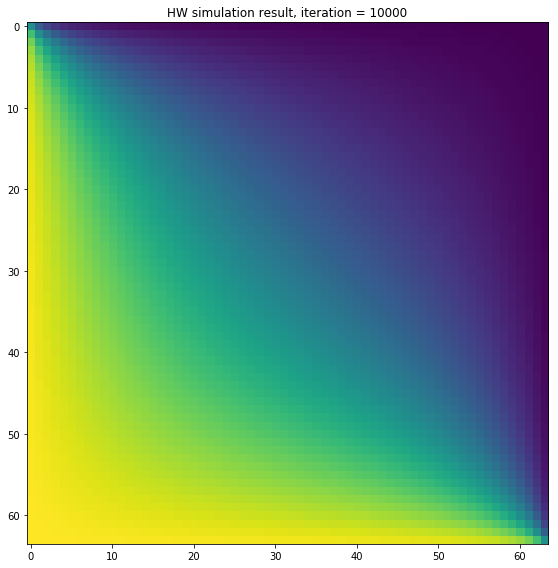

In [3]:
time_start = time.time()
hw.write(0x00, 0x01)
isready = hw.read(0x00)
while(isready == 1):
    isready = hw.read(0x00)
time_end = time.time()
print('total elapse time = ',time_end-time_start,' sec')

fig = plt.figure(figsize=(8,8))
#plt.pcolormesh(A, shading='flat')
#plt.contour(A)
plt.imshow(A)

plt.title('HW simulation result, iteration = '+str(iter))
plt.tight_layout()
plt.show()